In [ ]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Datasets/DevanagariHandwrittenCharacterDataset_10_percent_train_100_percent_test.zip

In [ ]:
!unzip '/content/drive/MyDrive/Datasets/Khadi Dateset/Hindi-OCR-Merged.zip'

In [ ]:
!unzip '/content/drive/MyDrive/DataSets/Train_git.zip'

In [ ]:
trainDataGen = ImageDataGenerator(
		rotation_range = 10,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.05,
		zoom_range = 0.1,
		brightness_range=(0.9, 1.1),
		horizontal_flip = False,
		fill_mode = 'constant')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainGenerator = trainDataGen.flow_from_directory(
			"/content/content/Train_git",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")

Found 78309 images belonging to 57 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
			"/content/content/Test_git",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')


Found 13909 images belonging to 57 classes.


# Model v0 (97%)


In [ ]:
model = Sequential()
#  ----------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#  ----------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
#model.add(Dropout(0.25))

#  ----------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#  ----------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#model.add(Dropout(0.2))
#  ----------------------------------------

model.add(Flatten())

model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))

model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])

print(model.summary())



# ResNet Model

In [ ]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0, VGG16

resnet = ResNet50(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(32,32,1),
    pooling='avg',
    classes=46,
)
for layer in resnet.layers:
  layer.trainable=True

model = Sequential()

model.add(resnet)

model.add(Flatten())

model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

model.add(Dense(387,
		activation = "softmax",
		kernel_initializer = "uniform"))

model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])

print(model.summary())

# Research Paper

In [ ]:
from keras.layers import Conv2D


model = Sequential()

model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

model.add(Dropout(0.25))

model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(57, activation='softmax'))


model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [ ]:

res = model.fit(
		trainGenerator,
		epochs = 40,
		validation_data = validation_generator,
		)

Epoch 1/40
2448/2448 [==============================] - 302s 123ms/step - loss: 0.9606 - accuracy: 0.7263 - val_loss: 0.1831 - val_accuracy: 0.9500
Epoch 2/40
2448/2448 [==============================] - 297s 121ms/step - loss: 0.3581 - accuracy: 0.8903 - val_loss: 0.0952 - val_accuracy: 0.9712
Epoch 3/40
2448/2448 [==============================] - 297s 121ms/step - loss: 0.2656 - accuracy: 0.9185 - val_loss: 0.0747 - val_accuracy: 0.9773
Epoch 4/40
2448/2448 [==============================] - 290s 119ms/step - loss: 0.2242 - accuracy: 0.9300 - val_loss: 0.0619 - val_accuracy: 0.9797
Epoch 5/40
2448/2448 [==============================] - 289s 118ms/step - loss: 0.1919 - accuracy: 0.9396 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 6/40
2448/2448 [==============================] - 289s 118ms/step - loss: 0.1758 - accuracy: 0.9448 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 7/40
2448/2448 [==============================] - 295s 121ms/step - loss: 0.1594 - accuracy: 0.9509 - val_

# GitHub

In [ ]:

model = Sequential()

#input size is 32 by 32 and filter is grayscale,
#we want to get 32 filters so here 32 filters of size (3, 3) will be used which gives 32 filter maps
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 1), data_format = 'channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(57, activation='softmax'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

In [ ]:
import tensorflow as tf

# Create the SGD optimizer with updated syntax
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=True
)

# Compile the model, using the optimizer and other arguments directly
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


In [ ]:
res = model.fit(
		trainGenerator,
		epochs = 50,
		validation_data = validation_generator,
    batch_size = 32,
    validation_split = 0.2,
    shuffle = True
		)

Epoch 1/50
2448/2448 [==============================] - 91s 35ms/step - loss: 1.3619 - accuracy: 0.6191 - val_loss: 0.2519 - val_accuracy: 0.9315
Epoch 2/50
2448/2448 [==============================] - 84s 34ms/step - loss: 0.4690 - accuracy: 0.8569 - val_loss: 0.1514 - val_accuracy: 0.9590
Epoch 3/50
2448/2448 [==============================] - 84s 34ms/step - loss: 0.3359 - accuracy: 0.8963 - val_loss: 0.1123 - val_accuracy: 0.9682
Epoch 4/50
2448/2448 [==============================] - 85s 35ms/step - loss: 0.2700 - accuracy: 0.9183 - val_loss: 0.1012 - val_accuracy: 0.9693
Epoch 5/50
2448/2448 [==============================] - 86s 35ms/step - loss: 0.2279 - accuracy: 0.9296 - val_loss: 0.0620 - val_accuracy: 0.9804
Epoch 6/50
2448/2448 [==============================] - 86s 35ms/step - loss: 0.2059 - accuracy: 0.9353 - val_loss: 0.0514 - val_accuracy: 0.9843
Epoch 7/50
2448/2448 [==============================] - 100s 41ms/step - loss: 0.1873 - accuracy: 0.9428 - val_loss: 0.0476 

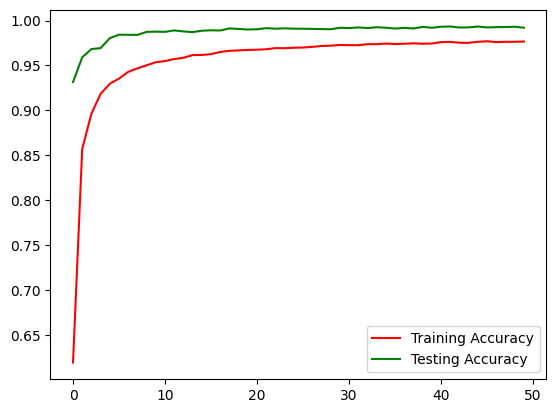

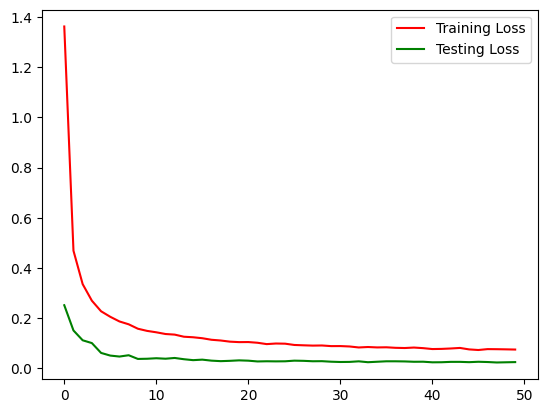

In [ ]:
%matplotlib inline
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [ ]:
max(res.history['accuracy'])

0.924936056137085

In [ ]:
import os

def get_folder_names(directory):
    folder_names = []
    for item in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, item)):
            folder_names.append(item)
    return folder_names

# Specify the directory path
directory_path = '/content/content/Test_git'

# Get folder names
folders_list = get_folder_names(directory_path)
folders_list.sort()
# Print the list of folder names
print("Folder Names:", folders_list)


Folder Names: [' क', ' क्ष', ' ख', ' ग', ' घ', ' ङ', ' च', ' छ', ' ज', ' ज्ञ', ' झ', ' ञ', ' ट', ' ठ', ' ड', ' ढ', ' ण', ' त', ' त्र', ' थ', ' द', ' ध', ' प', ' ब', ' भ', ' म', ' य', ' र', ' ल', ' व', ' श', ' ष', ' स', ' ह', ' १', ' २', ' ३', ' ४', ' ५', ' ६', ' ७', ' ८', ' ९', 'कं', 'कः', 'का', 'कि', 'की', 'कु', 'कू', 'के', 'कै', 'को', 'कौ', 'न', 'फ', '०']


In [ ]:
test_image_path = "/content/content/Test_git/कं/pixil-frame-6.png"
# labels = ['अ', 'अं', 'अः', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'कं', 'कः', 'का', 'कि', 'की', 'कु', 'कू', 'के', 'कै', 'को', 'कौ', 'क्ष', 'ख', 'खं', 'खः', 'खा', 'खि', 'खी', 'खु', 'खू', 'खे', 'खै', 'खो', 'खौ', 'ग', 'गं', 'गः', 'गा', 'गि', 'गी', 'गु', 'गू', 'गे', 'गै', 'गो', 'गौ', 'घ', 'घं', 'घः', 'घा', 'घि', 'घी', 'घु', 'घू', 'घे', 'घै', 'घो', 'ङ', 'च', 'चं', 'चः', 'चा', 'चि', 'ची', 'चु', 'चू', 'चे', 'चै', 'चो', 'चौ', 'छ', 'छं', 'छः', 'छा', 'छि', 'छी', 'छु', 'छू', 'छे', 'छै', 'छो', 'छौ', 'ज', 'जं', 'जः', 'जा', 'जि', 'जी', 'जु', 'जू', 'जे', 'जै', 'जो', 'जौ', 'ज्ञ', 'झ', 'झं', 'झः', 'झा', 'झि', 'झी', 'झु', 'झू', 'झे', 'झै', 'झो', 'झौ', 'ञ', 'ट', 'टं', 'टः', 'टा', 'टि', 'टी', 'टु', 'टू', 'टे', 'टै', 'टो', 'टौ', 'ठ', 'ठं', 'ठः', 'ठा', 'ठि', 'ठी', 'ठु', 'ठू', 'ठे', 'ठै', 'ठो', 'ठौ', 'ड', 'डं', 'डः', 'डा', 'डि', 'डी', 'डु', 'डू', 'डे', 'डै', 'डो', 'डौ', 'ढ', 'ढं', 'ढः', 'ढा', 'ढि', 'ढी', 'ढु', 'ढू', 'ढे', 'ढै', 'ढो', 'ढौ', 'ण', 'णं', 'णः', 'णा', 'णि', 'णी', 'णु', 'णू', 'णे', 'णै', 'णो', 'णौ', 'त', 'तं', 'तः', 'ता', 'ति', 'ती', 'तु', 'तू', 'ते', 'तै', 'तो', 'तौ', 'त्र', 'थ', 'थं', 'थः', 'था', 'थि', 'थी', 'थु', 'थू', 'थे', 'थै', 'थो', 'थौ', 'द', 'दं', 'दः', 'दा', 'दि', 'दी', 'दु', 'दू', 'दे', 'दै', 'दो', 'दौ', 'ध', 'धं', 'धः', 'धा', 'धि', 'धी', 'धु', 'धू', 'धे', 'धै', 'धो', 'धौ', 'न', 'नं', 'नः', 'ना', 'नि', 'नी', 'नु', 'नू', 'ने', 'नै', 'नो', 'नौ', 'प', 'पं', 'पः', 'पा', 'पि', 'पी', 'पु', 'पू', 'पे', 'पै', 'पो', 'पौ', 'फ', 'फं', 'फः', 'फा', 'फि', 'फी', 'फु', 'फू', 'फे', 'फै', 'फो', 'फौ', 'ब', 'बं', 'बः', 'बा', 'बि', 'बी', 'बु', 'बू', 'बे', 'बै', 'बो', 'बौ', 'भ', 'भं', 'भः', 'भा', 'भि', 'भी', 'भु', 'भू', 'भे', 'भै', 'भो', 'भौ', 'म', 'मं', 'मः', 'मा', 'मि', 'मी', 'मु', 'मू', 'मे', 'मै', 'मो', 'मौ', 'य', 'यं', 'यः', 'या', 'यि', 'यी', 'यु', 'यू', 'ये', 'यै', 'यो', 'यौ', 'र', 'रं', 'रः', 'रा', 'रि', 'री', 'रे', 'रै', 'रो', 'रौ', 'ल', 'लं', 'लः', 'ला', 'लि', 'ली', 'लु', 'लू', 'ले', 'लै', 'लो', 'लौ', 'व', 'वं', 'वः', 'वा', 'वि', 'वी', 'वु', 'वू', 'वे', 'वै', 'वो', 'वौ', 'श', 'शं', 'शः', 'शा', 'शि', 'शी', 'शु', 'शू', 'शे', 'शै', 'शो', 'शौ', 'ष', 'षं', 'षः', 'षा', 'षि', 'षी', 'षु', 'षू', 'षे', 'षै', 'षो', 'षौ', 'स', 'सं', 'सः', 'सा', 'सि', 'सी', 'सु', 'सू', 'से', 'सै', 'सो', 'सौ', 'ह', 'हं', 'हः', 'हा', 'हि', 'ही', 'हु', 'हू', 'हे', 'है', 'हो', 'हौ']

# labels = ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
# characters = '०,क,ख,ग,घ,ङ,च,छ,ज,झ,ञ,ट,ठ,ड,ढ,ण,त,थ,द,ध,न,प,फ,ब,भ,म,य,र,ल,व,श,ष,स,ह,क्ष,त्र,ज्ञ,१,२,३,४,५,६,७,८,९'
# labels = characters.split(',')
labels = folders_list
print(labels)

# Load and preprocess the image
img = image.load_img(test_image_path, target_size=(32, 32), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to match the training data preprocessing

# Make predictions
predictions = model.predict(img_array)

# Decode predictions to get class labels
predicted_labels = [labels[np.argmax(prediction)] for prediction in predictions]

# Print the predicted labels
print("Predicted Labels:", predicted_labels)

[' क', ' क्ष', ' ख', ' ग', ' घ', ' ङ', ' च', ' छ', ' ज', ' ज्ञ', ' झ', ' ञ', ' ट', ' ठ', ' ड', ' ढ', ' ण', ' त', ' त्र', ' थ', ' द', ' ध', ' प', ' ब', ' भ', ' म', ' य', ' र', ' ल', ' व', ' श', ' ष', ' स', ' ह', ' १', ' २', ' ३', ' ४', ' ५', ' ६', ' ७', ' ८', ' ९', 'कं', 'कः', 'का', 'कि', 'की', 'कु', 'कू', 'के', 'कै', 'को', 'कौ', 'न', 'फ', '०']
1/1 [==============================] - 0s 309ms/step
Predicted Labels: ['कं']


In [ ]:
predictions

array([[2.70034495e-10, 9.92111206e-01, 1.93382113e-03, 1.22601472e-04,
        2.72538932e-03, 1.91360968e-12, 8.73604108e-07, 1.53714430e-09,
        3.02888895e-03, 1.26614352e-09, 2.17690364e-08, 1.24147705e-08,
        1.04457749e-08, 6.42267142e-11, 1.23299822e-06, 3.52325374e-12,
        8.68902866e-11, 7.69677158e-08, 6.94076016e-06, 6.07510708e-09,
        4.65905287e-05, 4.08913614e-08, 4.33877309e-11, 3.45383500e-09,
        3.00951513e-08, 1.91652416e-05, 4.79857842e-09, 1.41242120e-08,
        1.71269582e-10, 9.77686751e-11, 6.24523011e-09, 2.10190410e-06,
        3.81935905e-09, 2.82889157e-09, 3.19175375e-09, 3.96096648e-13,
        3.45876316e-07, 5.27174495e-13, 1.74336581e-08, 1.80883113e-08,
        5.47858114e-09, 3.58539709e-09, 2.66132116e-10, 4.92236474e-08,
        2.87396915e-07, 8.02759246e-08]], dtype=float32)

In [ ]:
model.save("cnn5_gitdata_research_arch_k12.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_res = model.evaluate(validation_generator)

432/432 [==============================] - 5s 11ms/step - loss: 0.0267 - accuracy: 0.9927


In [ ]:
from keras.models import load_model
model = load_model('/content/cnn2.h5')

In [ ]:
test_res = model.evaluate(validation_generator)

435/435 [==============================] - 5s 12ms/step - loss: 0.0254 - accuracy: 0.9920


Data Merging


In [ ]:
!unzip /content/drive/MyDrive/DataSets/ki.zip -d /content/content/Train_git

Archive:  /content/drive/MyDrive/DataSets/ki.zip
   creating: /content/content/Train_git/कौ/
 extracting: /content/content/Train_git/कौ/pixil-frame-4.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-3.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-9.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-0.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-8.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-2.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-1.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-6.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-7.png  
 extracting: /content/content/Train_git/कौ/pixil-frame-5.png  
   creating: /content/content/Train_git/को/
 extracting: /content/content/Train_git/को/pixil-frame-4.png  
 extracting: /content/content/Train_git/को/pixil-frame-3.png  
 extracting: /content/content/Train_git/को/pixil-frame-9.png  
 extracting: /content/content/Train_git/को/p

In [ ]:
!unzip /content/drive/MyDrive/DataSets/ki.zip -d /content/content/Test_git

Archive:  /content/drive/MyDrive/DataSets/ki.zip
   creating: /content/content/Test_git/कौ/
 extracting: /content/content/Test_git/कौ/pixil-frame-4.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-3.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-9.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-0.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-8.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-2.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-1.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-6.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-7.png  
 extracting: /content/content/Test_git/कौ/pixil-frame-5.png  
   creating: /content/content/Test_git/को/
 extracting: /content/content/Test_git/को/pixil-frame-4.png  
 extracting: /content/content/Test_git/को/pixil-frame-3.png  
 extracting: /content/content/Test_git/को/pixil-frame-9.png  
 extracting: /content/content/Test_git/को/pixil-frame-0.png